## DATA 601 Project-2
### Jaspreet Singh Bhatia & Sravani Ravulaparthi
Due date: May 19, 2022. 23:59 pm.<br>
Groups will be determined at the April 29 class. <br>
<br>

For your second project, you will be working on the flights dataset that we used earlier. <br>
We have 5 csv files and 5 Excel files. You can learn more about the content of the csv files at <br>
https://cran.r-project.org/web/packages/nycflights13/nycflights13.pdf
<br>
<br>
<b> FILES (https://github.com/simsekergun/DATA601/tree/main/Project2/datasets) </b>
* flights2DCMDVA.xlsx (Note that this is a smaller version of the original NYCflights13.csv data) <br>
* airlines.csv <br>
* airports.csv <br>
* planes.csv <br>
* weatherNYhourly.csv (NY daily weather)<br>
* weatherMDdaily.xlsx (MD daily temperature/precip/snow data) <br>
* weatherNYdaily.xlsx (NY daily temperature/precip/snow data) <br>
* federal-holidays-2013.xlsx <br>
* flights_test_data.xlsx (only needed for Q4 and Q5)<br>

We are only interested in flights from NY to three local airports:
* IAD: Dulles International Airport
* BWI: Baltimore/Washington International Thurgood Marshall Airport
* DCA: Ronald Reagan Washington National Airport

After carrying out EAD, please work on the following questions. You will need to submit your notebook and report (as a pdf file). <br> 
The report should include
* Names of the students, Title of the project (e.g. DATA 601 | Project 2| NY-DC/MD/VA Flights), and date
* A brief introduction
* Clear answers to the questions. Make sure that you have enough number of images with proper figure captions and numbering.

Answer the following questions or complete the tasks <br>

#### Question/Task 1
a. Calculate the total number of seats for all the planned flights for each destination separately? <br>
b. What is the day of the year with the highest number of flights? <br>
c. What is the day of the year with the highest number of seats available on that day? <br>

#### Question/Task 2
a. What day of the year most cancellations happened? <br>
b. Is there any relationship between the weather datasets and cancellations? If yes, describe it and justify with a statistical model (hypothesis testing).<br>
c. Is there any relationship between the Federal Holiday Schedule and cancellations? If yes, describe it and justify with a statistical model (hypothesis testing).<br>
d. What is the total number of seats for the cancelled flights? If we assume the average flight price of $50, what is the total economis loss?<br>
e. Determine the ratio of cancelled flights/planned flights for each airline company, list it, and determine the most and least reliable airline company (most reliable = the one that has the smallest ratio of cancelled/planned)<br>


For the next group of questions/tasks, do not include the cancelled flights.

#### Question/Task 3
a. Calculate the average arrival delay for all the flights that took place in the same day and plot it (x = 1:365, y = daily average delay). On the same plot, please mark the Federal Holidays from the federal-holidays-2013.xlsx dataset.<br>
b. Is there a correlation between the weather datasets and daily average arrival delay? Justify your answer with a statistical model (hypothesis testing)<br>
c. Is there a correlation between the Federal Holiday Schedule and daily average arrival delay?<br>
d. Calculate the average arrival delay for all the flights for each arrival airport (e.g. IAD, DCA, and BWI) and determine most and least reliables (most reliable = the one that has the shortest average delay)<br>
e. Calculate the average arrival delay for all the airlines and determine most and least reliables (most reliable = the one that has the shortest average delay) <br>
f. What day of the week we had the highest average delay?<br>
g. Which one had a higher average delay: flights that took off in the morning (6 am to 10 am), noon (11 am to 2 pm), afternoon (3 pm to 5pm), or evening (6 pm to 10 pm)?<br>
h. Determine the number of airplanes used in these flights manufactured by BOEING, EMBRAER, and AURBUS separately. <br>
<br>

#### Question/Task 4
Build a linear regression model to estimate the arrival delay of the flights given in "fligts_test_data.xlsx". Note that you have the full autorithy to decide what columns, what datasets (among the given datasets) to work with. In your report, please explain how you build the LR model and eloborate on its accuracy. 

#### Question/Task 5
Build a logistic regression model to guess the 3 cancelled flights given in "fligts_test_data.xlsx". Again, you have the full autorithy to decide what columns, what datasets (among the given datasets) to work with. In your report, please explain how you build the LogReg model and eloborate on its accuracy.

In [110]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import bar
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
from scipy import stats
import math
from statsmodels.formula.api import ols
from statsmodels.stats.anova import AnovaRM
from statistics import mean
from scipy.stats import ttest_ind

# sklearn stuff
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error

In [111]:
flights = pd.read_csv('https://raw.githubusercontent.com/SravaniRVS/DATA601/main/Project%202/flights.csv', parse_dates= {"Date" : ["year","month","day"]},keep_date_col=True)
flights.drop(columns=['Unnamed: 0'], inplace=True)
flights = flights[(flights['dest'] == 'BWI') | (flights['dest']== 'DCA') | (flights['dest'] == 'IAD')]
planes = pd.read_csv('https://raw.githubusercontent.com/SravaniRVS/DATA601/main/Project%202/planes.csv')
airlines = pd.read_csv('https://raw.githubusercontent.com/SravaniRVS/DATA601/main/Project%202/airlines.csv')
airports = pd.read_csv('https://raw.githubusercontent.com/SravaniRVS/DATA601/main/Project%202/airports.csv')
md_daily = pd.read_excel('https://raw.githubusercontent.com/SravaniRVS/DATA601/main/Project%202/weatherMDdaily.xlsx')
ny_daily = pd.read_excel('https://raw.githubusercontent.com/SravaniRVS/DATA601/main/Project%202/weatherNYdaily.xlsx')
ny_hourly = pd.read_csv('https://raw.githubusercontent.com/SravaniRVS/DATA601/main/Project%202/weatherNYhourly.csv', parse_dates= {"Date" : ["year","month","day"]},keep_date_col=True)

In [112]:
flights.reset_index(inplace=True)
flights.drop(columns=['index'], inplace=True)
flights

,Date,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute
0,2013-01-01,2013,1,1,629.0,-1.0,721.0,-19.0,WN,N273WN,4646,LGA,BWI,40.0,185,6.0,29.0
1,2013-01-01,2013,1,1,848.0,853.0,1001.0,851.0,MQ,N942MQ,3944,JFK,BWI,41.0,184,8.0,48.0
2,2013-01-01,2013,1,1,1059.0,-1.0,1201.0,-14.0,WN,N505SW,321,LGA,BWI,43.0,185,10.0,59.0
3,2013-01-01,2013,1,1,1158.0,-2.0,1256.0,-4.0,WN,N783SW,1568,EWR,BWI,38.0,169,11.0,58.0
4,2013-01-01,2013,1,1,1316.0,2.0,1412.0,-3.0,EV,N11551,4340,EWR,BWI,38.0,169,13.0,16.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17181,2013-12-31,2013,12,31,1105.0,53.0,1211.0,36.0,EV,N835AS,5769,LGA,IAD,44.0,229,11.0,5.0
17182,2013-12-31,2013,12,31,1406.0,0.0,1534.0,8.0,EV,N826AS,5712,JFK,IAD,59.0,228,14.0,6.0
17183,2013-12-31,2013,12,31,1430.0,-2.0,1546.0,-9.0,YV,N515MJ,3771,LGA,IAD,52.0,229,14.0,30.0
17184,2013-12-31,2013,12,31,1447.0,-7.0,1604.0,-27.0,9E,N8477R,2946,JFK,IAD,51.0,228,14.0,47.0


In [113]:
## EDA of flights data

In [114]:
print("Shape of the dataset is:", flights.shape, "\n\n")
print("Information about the dataset : \n\n")
flights.info()
print("\n\n Description of the dataset : \n")
flights.describe()

Shape of the dataset is: (17186, 17) 


Information about the dataset : 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17186 entries, 0 to 17185
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       17186 non-null  datetime64[ns]
 1   year       17186 non-null  object        
 2   month      17186 non-null  object        
 3   day        17186 non-null  object        
 4   dep_time   16244 non-null  float64       
 5   dep_delay  16244 non-null  float64       
 6   arr_time   16197 non-null  float64       
 7   arr_delay  16181 non-null  float64       
 8   carrier    17186 non-null  object        
 9   tailnum    16811 non-null  object        
 10  flight     17186 non-null  int64         
 11  origin     17186 non-null  object        
 12  dest       17186 non-null  object        
 13  air_time   16181 non-null  float64       
 14  distance   17186 non-null  int64         
 15  hour       1

,dep_time,dep_delay,arr_time,arr_delay,flight,air_time,distance,hour,minute
count,16244.000000,16244.000000,16197.000000,16181.000000,17186.000000,16181.000000,17186.000000,16244.000000,16244.000000
mean,1384.065747,13.150517,1497.865839,10.835919,3667.399162,45.745319,212.323170,13.490396,35.026102
std,491.080973,41.683282,501.327183,45.396630,1390.788852,6.552948,14.248791,4.943026,19.032372
min,2.000000,-32.000000,1.000000,-62.000000,63.000000,31.000000,169.000000,0.000000,0.000000
25%,956.000000,-6.000000,1109.000000,-13.000000,2187.000000,41.000000,212.000000,9.000000,19.000000
50%,1435.000000,-3.000000,1543.000000,-3.000000,3761.000000,45.000000,214.000000,14.000000,38.000000
75%,1819.000000,11.000000,1922.000000,16.000000,4418.000000,49.000000,228.000000,18.000000,53.000000
max,2400.000000,853.000000,2400.000000,851.000000,6181.000000,131.000000,229.000000,24.000000,59.000000


In [115]:
flights.isnull().sum()

Date            0
year            0
month           0
day             0
dep_time      942
dep_delay     942
arr_time      989
arr_delay    1005
carrier         0
tailnum       375
flight          0
origin          0
dest            0
air_time     1005
distance        0
hour          942
minute        942
dtype: int64

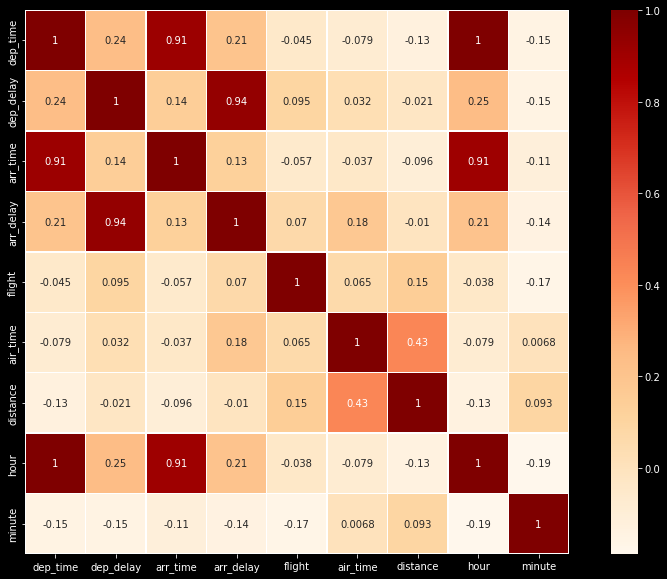

In [116]:
plt.figure(figsize = (15,10))
df_corr = flights.drop(['year',], axis=1)
sns.heatmap(df_corr.corr(), annot=True,square=True,cmap='OrRd', linewidth=0.5, annot_kws = {'size':10}, fmt='.2g' )

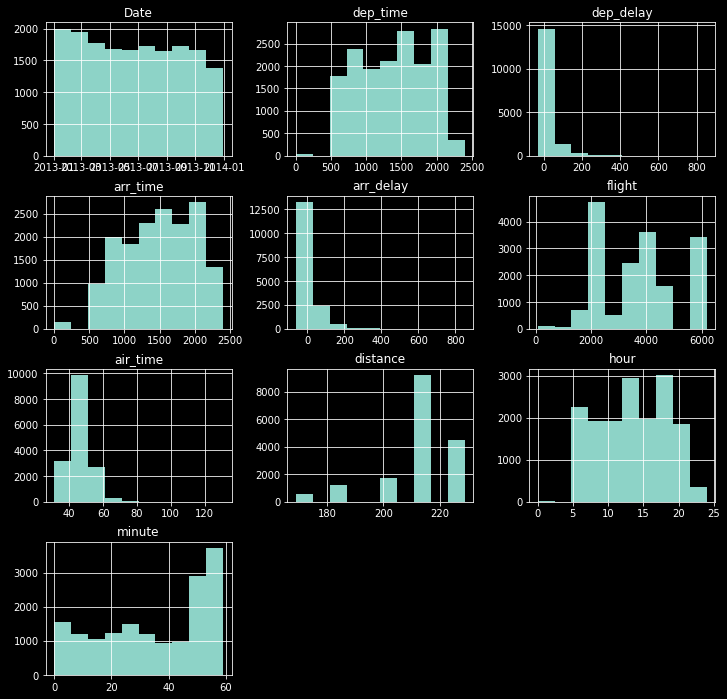

In [117]:
flights.hist(figsize=(12,12))
plt.show()

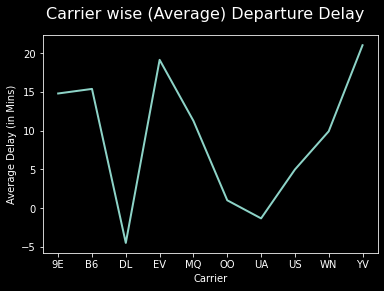

In [118]:
#departure  delay carrier wise 
b=flights[['dep_delay','carrier']].groupby('carrier').mean()

plt.plot(b, linewidth=2.0)
plt.xlabel('Carrier')
plt.ylabel('Average Delay (in Mins)')
plt.suptitle('Carrier wise (Average) Departure Delay',fontsize=16)

plt.show()

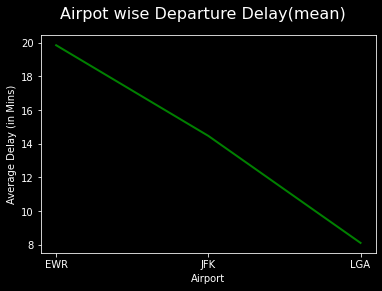

In [119]:
#departure delay airport wise 

c=flights[['dep_delay','origin']].groupby('origin').mean()

plt.plot(c, linewidth=2.0,color='green')
plt.xlabel('Airport')
plt.ylabel('Average Delay (in Mins)')
plt.suptitle('Airpot wise Departure Delay(mean)',fontsize=16)

plt.show()

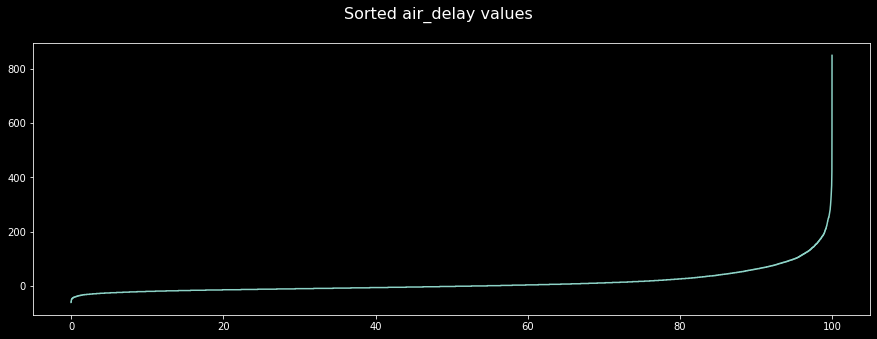

In [120]:
# let's plot sorted values of arr_delay between x = 0 (where min arr_delay occurs) and x = 100 (where max arr_delay happens)
arr_delay = flights.arr_delay.dropna().values
x = np.arange(len(arr_delay)) / len(arr_delay)*100
plt.figure(figsize = (15, 5))
plt.suptitle('Sorted air_delay values',fontsize=16)
plt.plot(x,np.sort(arr_delay))
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


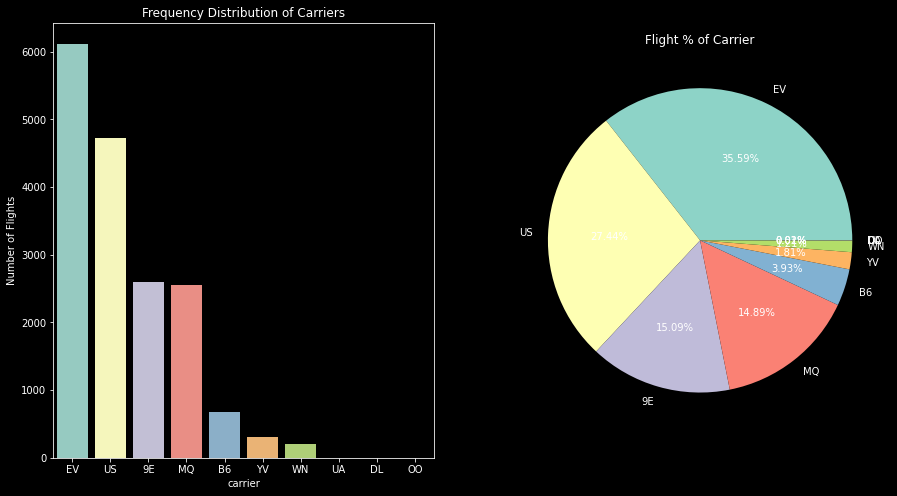

In [121]:
#Graphical representation of carriers scheduled flights in numbers and %

f,ax=plt.subplots(1,2,figsize=(15,8))
flights['carrier'].value_counts().plot.pie(autopct='%1.2f%%',ax=ax[1],shadow=False)                                                  
ax[1].set_title('Flight % of Carrier')
ax[1].set_ylabel('')
sns.countplot('carrier',order = flights['carrier'].value_counts().index, data=flights,ax=ax[0])
ax[0].set_title('Frequency Distribution of Carriers')
ax[0].set_ylabel('Number of Flights')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


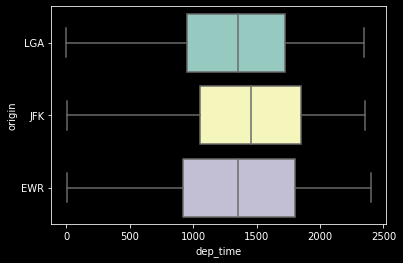

The highest IQ range (900 to 1800) is for JFK, where 75% flights are falling under the 
departure time of 1800 and  middle data point for departure is near 1500 


In [122]:
sns.boxplot('dep_time','origin',data = flights)

plt.show()
print("The highest IQ range (900 to 1800) is for JFK, where 75% flights are falling under the \ndeparture time of 1800 and  middle data point for departure is near 1500 ")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


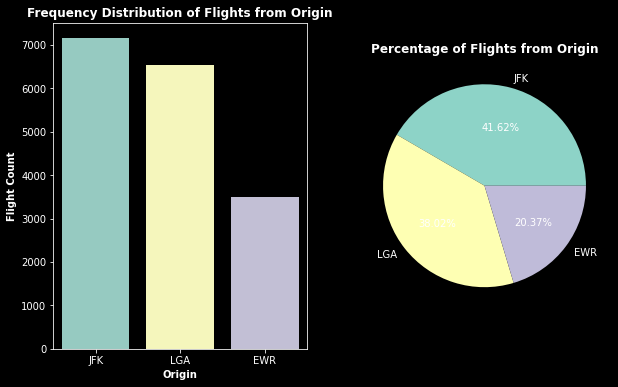

In [123]:
f,ax=plt.subplots(1,2,figsize=(10,6))
flights['origin'].value_counts().plot.pie(autopct='%1.2f%%',ax=ax[1],shadow=False)                                                  
ax[1].set_title('Percentage of Flights from Origin', fontweight='bold')
ax[1].set_ylabel('')
sns.countplot('origin',order = flights['origin'].value_counts().index, data=flights,ax=ax[0])
ax[0].set_title('Frequency Distribution of Flights from Origin', fontweight='bold')
ax[0].set_ylabel('Flight Count', fontweight='bold')
ax[0].set_xlabel('Origin', fontweight='bold')

plt.show()

Text(0, 0.5, 'Total')

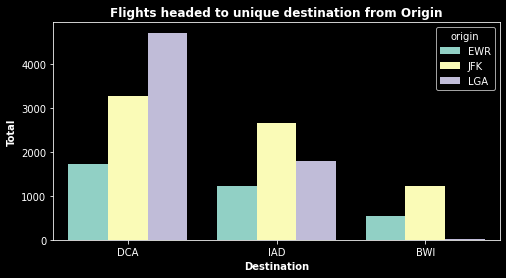

In [124]:
#  Maximum number of flights headed to unique destination from Origin.

dest_flight = flights.groupby('origin')['dest'].value_counts().reset_index(name='Total')

plt.figure(figsize=(8,4))
sns.barplot(data=dest_flight,x='dest',y='Total', hue='origin', saturation=0.9)
plt.title('Flights headed to unique destination from Origin', fontweight='bold')
plt.xlabel('Destination', fontweight='bold')
plt.ylabel('Total', fontweight='bold')

In [125]:
flights.fillna(0, inplace=True)
flights = flights.assign(Cancelled=(flights.air_time==0))
flights['Cancelled'] = flights['Cancelled'].astype(int)##if flights['Cancelled']==1 is true, it means the flight is cancelled
flights.head()

,Date,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute,Cancelled
0,2013-01-01,2013,1,1,629.0,-1.0,721.0,-19.0,WN,N273WN,4646,LGA,BWI,40.0,185,6.0,29.0,0
1,2013-01-01,2013,1,1,848.0,853.0,1001.0,851.0,MQ,N942MQ,3944,JFK,BWI,41.0,184,8.0,48.0,0
2,2013-01-01,2013,1,1,1059.0,-1.0,1201.0,-14.0,WN,N505SW,321,LGA,BWI,43.0,185,10.0,59.0,0
3,2013-01-01,2013,1,1,1158.0,-2.0,1256.0,-4.0,WN,N783SW,1568,EWR,BWI,38.0,169,11.0,58.0,0
4,2013-01-01,2013,1,1,1316.0,2.0,1412.0,-3.0,EV,N11551,4340,EWR,BWI,38.0,169,13.0,16.0,0


In [126]:
##New York hourly weather data EDA
print("Shape of the dataset is:", ny_hourly.shape, "\n\n")
print("Information about the dataset : \n\n")
ny_hourly.info()
print("\n\n Description of the dataset : \n")
ny_hourly.describe()

Shape of the dataset is: (26115, 16) 


Information about the dataset : 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26115 entries, 0 to 26114
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        26115 non-null  datetime64[ns]
 1   origin      26115 non-null  object        
 2   year        26115 non-null  object        
 3   month       26115 non-null  object        
 4   day         26115 non-null  object        
 5   hour        26115 non-null  int64         
 6   temp        26114 non-null  float64       
 7   dewp        26114 non-null  float64       
 8   humid       26114 non-null  float64       
 9   wind_dir    25655 non-null  float64       
 10  wind_speed  26111 non-null  float64       
 11  wind_gust   5337 non-null   float64       
 12  precip      26115 non-null  float64       
 13  pressure    23386 non-null  float64       
 14  visib       26115 non-null  float64       


,hour,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib
count,26115.000000,26114.000000,26114.000000,26114.000000,25655.000000,26111.000000,5337.000000,26115.000000,23386.000000,26115.000000
mean,11.490791,55.260392,41.439985,62.530059,199.761060,10.517488,25.487071,0.004469,1017.898751,9.255372
std,6.912423,17.787852,19.386236,19.395918,107.306847,8.539253,5.954958,0.030154,7.423827,2.055052
min,0.000000,10.940000,-9.940000,12.740000,0.000000,0.000000,16.110920,0.000000,983.800000,0.000000
25%,6.000000,39.920000,26.060000,47.050000,120.000000,6.904680,20.714040,0.000000,1012.900000,10.000000
50%,11.000000,55.400000,42.080000,61.790000,220.000000,10.357020,24.166380,0.000000,1017.600000,10.000000
75%,17.000000,69.980000,57.920000,78.790000,290.000000,13.809360,28.769500,0.000000,1023.000000,10.000000
max,23.000000,100.040000,78.080000,100.000000,360.000000,1048.360580,66.745240,1.210000,1042.100000,10.000000


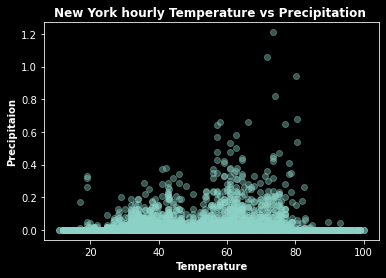

In [127]:
plt.title('New York hourly Temperature vs Precipitation ', fontweight='bold')
plt.xlabel("Temperature", fontweight='bold')
plt.ylabel("Precipitaion", fontweight='bold')
plt.scatter(ny_hourly.temp, ny_hourly.precip, alpha=0.4)

In [128]:
ny_corr = ny_hourly.corr()
ny_corr.style.background_gradient(cmap='OrRd')


,hour,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib
hour,1.000000,0.100485,-0.004574,-0.192396,0.032115,0.079289,-0.011333,-0.000007,-0.025582,0.035321
temp,0.100485,1.000000,0.894360,0.083535,-0.117654,-0.111119,-0.299666,0.008621,-0.252359,0.081998
dewp,-0.004574,0.894360,1.000000,0.512195,-0.239427,-0.168918,-0.244249,0.089723,-0.289815,-0.124536
humid,-0.192396,0.083535,0.512195,1.000000,-0.319222,-0.159362,0.068381,0.219888,-0.183516,-0.516742
wind_dir,0.032115,-0.117654,-0.239427,-0.319222,1.000000,0.241527,0.044403,-0.065679,-0.198806,0.201589
wind_speed,0.079289,-0.111119,-0.168918,-0.159362,0.241527,1.000000,0.881795,0.054282,-0.133434,0.020923
wind_gust,-0.011333,-0.299666,-0.244249,0.068381,0.044403,0.881795,1.000000,0.136395,-0.236942,-0.175269
precip,-0.000007,0.008621,0.089723,0.219888,-0.065679,0.054282,0.136395,1.000000,-0.108280,-0.319912
pressure,-0.025582,-0.252359,-0.289815,-0.183516,-0.198806,-0.133434,-0.236942,-0.108280,1.000000,0.123776
visib,0.035321,0.081998,-0.124536,-0.516742,0.201589,0.020923,-0.175269,-0.319912,0.123776,1.000000


In [129]:
ny_hourly.isnull().sum()

Date              0
origin            0
year              0
month             0
day               0
hour              0
temp              1
dewp              1
humid             1
wind_dir        460
wind_speed        4
wind_gust     20778
precip            0
pressure       2729
visib             0
time_hour         0
dtype: int64

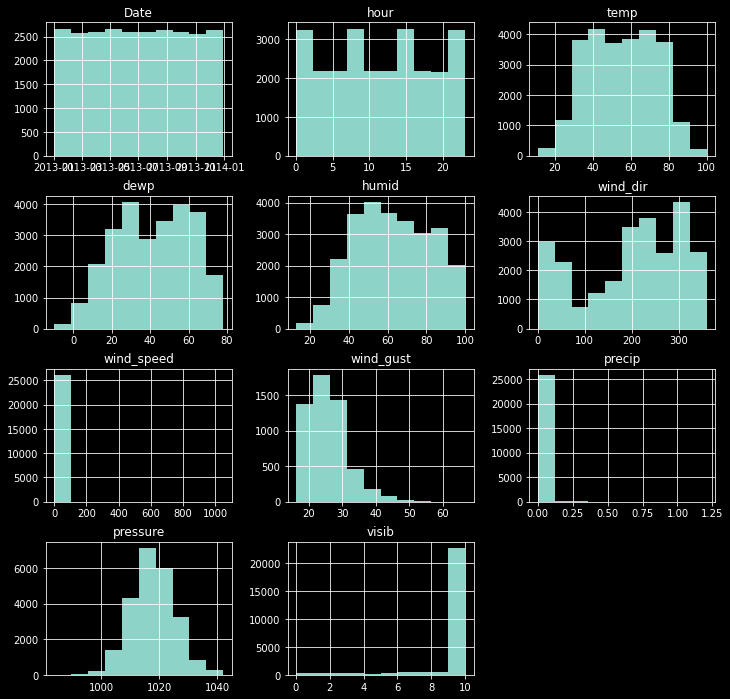

In [130]:
ny_hourly.hist(figsize=(12,12))
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


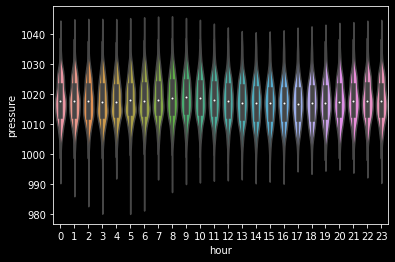

In [131]:
sns.violinplot("hour","pressure", data=ny_hourly,size=7)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2182: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


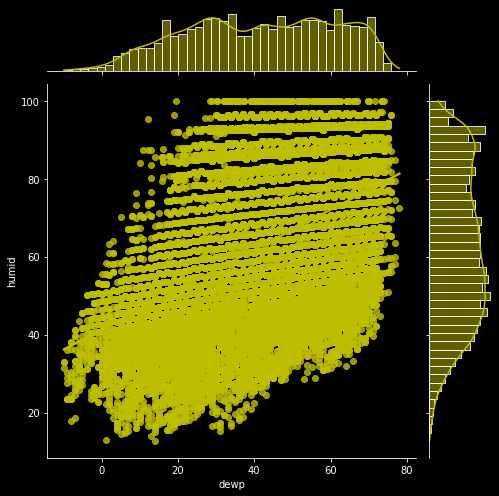

In [132]:
sns.jointplot("dewp", "humid", data=ny_hourly, kind="reg", color="y", size=7)

In [133]:
ny_hourly.columns

Index(['Date', 'origin', 'year', 'month', 'day', 'hour', 'temp', 'dewp',
       'humid', 'wind_dir', 'wind_speed', 'wind_gust', 'precip', 'pressure',
       'visib', 'time_hour'],
      dtype='object')

In [134]:
## NY daily data EDA
print("Shape of the dataset is:", ny_daily.shape, "\n\n")
print("Information about the dataset : \n\n")
ny_daily.info()
print("\n\n Description of the dataset : \n")
ny_daily.describe()

Shape of the dataset is: (365, 6) 


Information about the dataset : 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           365 non-null    datetime64[ns]
 1   Max Temp       365 non-null    int64         
 2   Min Temp       365 non-null    int64         
 3   Precipitation  365 non-null    object        
 4   Snowfall       365 non-null    object        
 5   Snow Depth     365 non-null    object        
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 17.2+ KB


 Description of the dataset : 



,Max Temp,Min Temp
count,365.000000,365.000000
mean,61.901370,47.389041
std,17.469003,16.406977
min,21.000000,12.000000
25%,48.000000,33.000000
50%,63.000000,46.000000
75%,77.000000,62.000000
max,100.000000,80.000000


In [135]:
ny_daily.isnull().sum()

Date             0
Max Temp         0
Min Temp         0
Precipitation    0
Snowfall         0
Snow Depth       0
dtype: int64

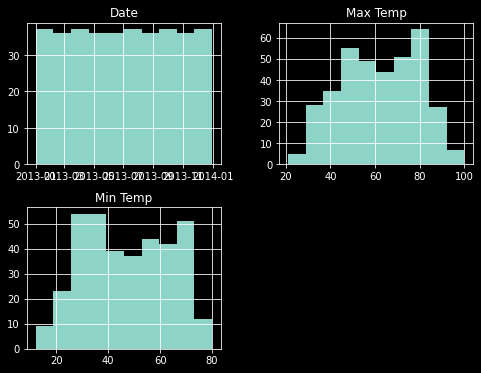

In [136]:
ny_daily.hist(figsize=(8,6))
plt.show()

##**Question 1**

### a. Calculate the total number of seats for all the planned flights for each destination separately?


In [137]:
merged_df = pd.merge(flights, planes.loc[:,planes.columns !='year'], on='tailnum')
merged_df.head()

,Date,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,...,hour,minute,Cancelled,type,manufacturer,model,engines,seats,speed,engine
0,2013-01-01,2013,1,1,629.0,-1.0,721.0,-19.0,WN,N273WN,...,6.0,29.0,0,Fixed wing multi engine,BOEING,737-7H4,2,140,NaN,Turbo-fan
1,2013-02-26,2013,2,26,1756.0,-4.0,1926.0,11.0,WN,N273WN,...,17.0,56.0,0,Fixed wing multi engine,BOEING,737-7H4,2,140,NaN,Turbo-fan
2,2013-01-01,2013,1,1,1059.0,-1.0,1201.0,-14.0,WN,N505SW,...,10.0,59.0,0,Fixed wing multi engine,BOEING,737-5H4,2,149,NaN,Turbo-jet
3,2013-01-01,2013,1,1,1158.0,-2.0,1256.0,-4.0,WN,N783SW,...,11.0,58.0,0,Fixed wing multi engine,BOEING,737-7H4,2,140,NaN,Turbo-fan
4,2013-01-03,2013,1,3,603.0,-2.0,709.0,4.0,WN,N783SW,...,6.0,3.0,0,Fixed wing multi engine,BOEING,737-7H4,2,140,NaN,Turbo-fan


In [138]:
tot_seats = merged_df.groupby('dest')['seats'].sum()
tot_seats.reset_index(name='Total')

,dest,Total
0,BWI,96135
1,DCA,906985
2,IAD,296499


Text(0, 0.5, 'Total Seats')

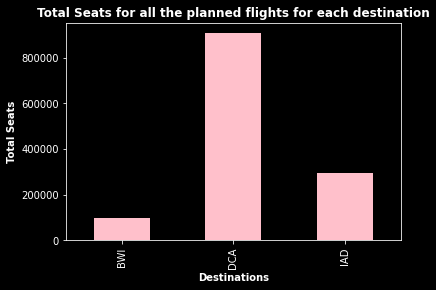

In [139]:
plot1 = tot_seats.plot(kind='bar', color='pink')
plot1.set_title('Total Seats for all the planned flights for each destination',fontweight='bold')
plot1.set_xlabel('Destinations',fontweight='bold')
plot1.set_ylabel('Total Seats',fontweight='bold')

### b. What is the day of the year with the highest number of flights?


In [140]:
x = flights.groupby(['Date']).Date.size().reset_index(name='Total')
y=x.Total.max()
z=x[x['Total']==y]
print("The day of the year having highest number of flights" '\n\n' ,z)

The day of the year having highest number of flights

          Date  Total
10 2013-01-11     61
16 2013-01-17     61


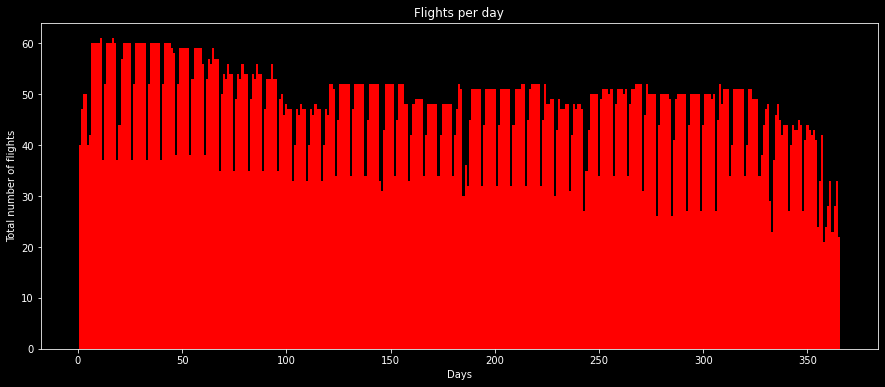

In [141]:
from matplotlib import style
days = [i for i in range(1,366)]
flts = x.Total

fig, ax = plt.subplots(figsize = (15,6))

plt.bar(days,flts,width=1,color='red')
plt.xlabel("Days")
plt.ylabel("Total number of flights")
plt.title("Flights per day") 
plt.plot()
plt.show()

### c. What is the day of the year with the highest number of seats available on that day?


In [142]:
x = merged_df.groupby(['Date']).seats.sum().reset_index(name='Total')
y=x.Total.max()
z=x[x['Total']==y]
print("The day and year with the highest number of seats available" '\n\n' ,z)

The day and year with the highest number of seats available

          Date  Total
58 2013-02-28   5379


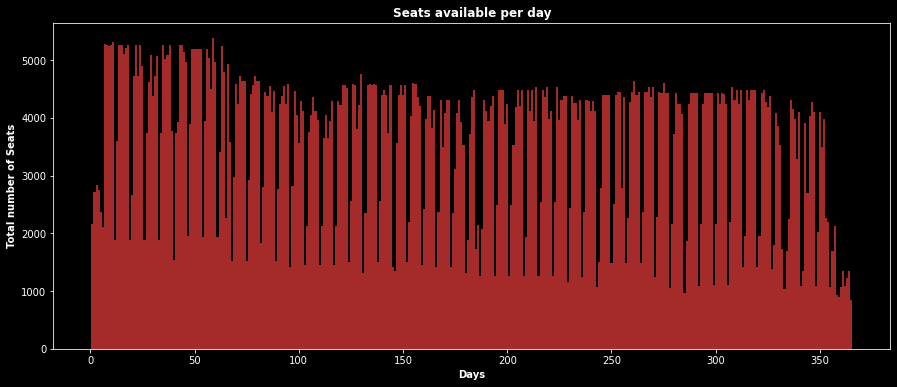

In [143]:
days = [i for i in range(1,366)]
seats = x.Total

fig, ax = plt.subplots(figsize = (15,6))

plt.bar(days,seats,width=1,color='brown')
plt.xlabel("Days", fontweight='bold')
plt.ylabel("Total number of Seats", fontweight='bold')
plt.title("Seats available per day", fontweight='bold')

plt.plot()
plt.show()

## **Question 2**

In [144]:
cancelled = flights[flights['Cancelled']==True]
cancelled = cancelled.merge(planes.loc[:,planes.columns !='year'], on='tailnum',how='left')
cancelled.head()

,Date,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,...,hour,minute,Cancelled,type,manufacturer,model,engines,seats,speed,engine
0,2013-01-13,2013,1,13,2239.0,40.0,0.0,0.0,EV,N17196,...,22.0,39.0,1,Fixed wing multi engine,EMBRAER,EMB-145XR,2.0,55.0,NaN,Turbo-fan
1,2013-01-13,2013,1,13,0.0,0.0,0.0,0.0,9E,0,...,0.0,0.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2013-01-13,2013,1,13,0.0,0.0,0.0,0.0,MQ,N655MQ,...,0.0,0.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2013-01-16,2013,1,16,0.0,0.0,0.0,0.0,9E,0,...,0.0,0.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2013-01-20,2013,1,20,0.0,0.0,0.0,0.0,EV,N16178,...,0.0,0.0,1,Fixed wing multi engine,EMBRAER,EMB-145XR,2.0,55.0,NaN,Turbo-fan


### a. What day of the year most cancellations happened?


In [145]:
x=cancelled.groupby(['Date']).Date.count().reset_index(name='Total')
y=x.Total.max()
z=x[x['Total']==y]
print("The day of the year most cancellations happened" '\n\n' ,z)

The day of the year most cancellations happened

          Date  Total
45 2013-03-06     46


###b. Is there any relationship between the weather datasets and cancellations? If yes, describe it and justify with a statistical model (hypothesis testing).

In [146]:
ny_weather = pd.merge(ny_hourly, ny_daily, on='Date')

In [147]:
flights['date_time'] = pd.to_datetime(flights[['year', 'month', 'day', 'hour']])
ny_weather['date_time'] = pd.to_datetime(ny_weather[['year', 'month', 'day', 'hour']])

In [148]:
cancel_ny_weather = flights.merge(ny_weather, on=['year','month','day','origin','date_time','Date','hour'],how='inner')
cancel_ny_weather.head()

,Date,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,...,wind_gust,precip,pressure,visib,time_hour,Max Temp,Min Temp,Precipitation,Snowfall,Snow Depth
0,2013-01-01,2013,1,1,629.0,-1.0,721.0,-19.0,WN,N273WN,...,23.01560,0.0,1011.7,10.0,2013-01-01T11:00:00Z,41,27,0,0,0
1,2013-01-01,2013,1,1,848.0,853.0,1001.0,851.0,MQ,N942MQ,...,NaN,0.0,1012.6,10.0,2013-01-01T13:00:00Z,41,27,0,0,0
2,2013-01-01,2013,1,1,821.0,-4.0,932.0,-13.0,MQ,N846MQ,...,NaN,0.0,1012.6,10.0,2013-01-01T13:00:00Z,41,27,0,0,0
3,2013-01-01,2013,1,1,1059.0,-1.0,1201.0,-14.0,WN,N505SW,...,20.71404,0.0,1012.1,10.0,2013-01-01T15:00:00Z,41,27,0,0,0
4,2013-01-01,2013,1,1,1058.0,-2.0,1210.0,-6.0,US,N951UW,...,20.71404,0.0,1012.1,10.0,2013-01-01T15:00:00Z,41,27,0,0,0


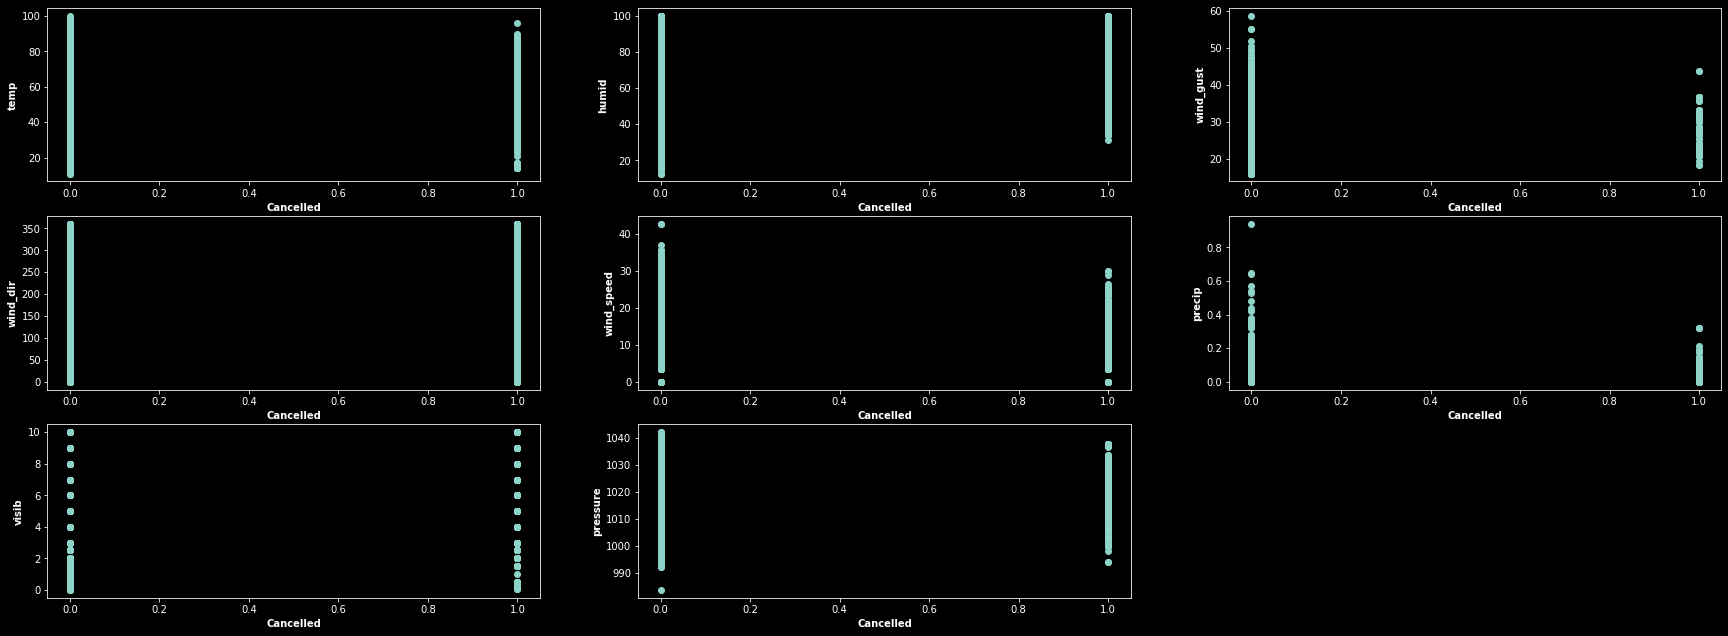

In [149]:
plt.figure(figsize=(30, 30))
features = ['temp', 'humid', 'wind_gust', 'wind_dir', 'wind_speed','precip', 'visib', 'pressure']
target = cancel_ny_weather['Cancelled']

for i, col in enumerate(features):
    plt.subplot( len(features),3, i+1)
    x = target
    y = cancel_ny_weather[col]
    plt.scatter(x, y)
    plt.xlabel('Cancelled',fontweight='bold')
    plt.ylabel(col,fontweight='bold')

**Temperature VS Cancellations**

Cancelled
0    56.055374
1    53.733333
Name: temp, dtype: float64


Text(0, 0.5, 'Average Temperature')

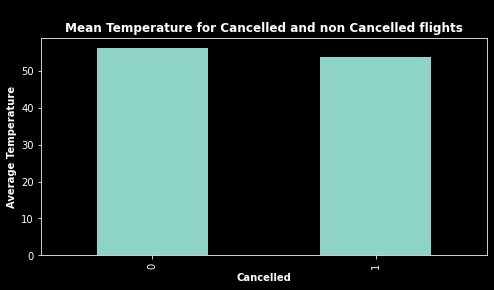

In [150]:
can_temp = cancel_ny_weather.groupby(['Cancelled']).temp.mean()
print(can_temp)
can_temp.plot(kind='bar', figsize=(8,4))
plt.title('\nMean Temperature for Cancelled and non Cancelled flights', fontweight='bold')
plt.xlabel('Cancelled', fontweight='bold')
plt.ylabel('Average Temperature', fontweight='bold')

The difference between mean temperature's on the day of cancelled and non-cancelled flights is three.(With cooler temperature on Cancelled days). It means there is a negative correlation relation between temperatue and cancellations.  

**Humidity VS Cancellations**

Cancelled
0    58.710149
1    74.249530
Name: humid, dtype: float64


Text(0, 0.5, 'Average Humidity')

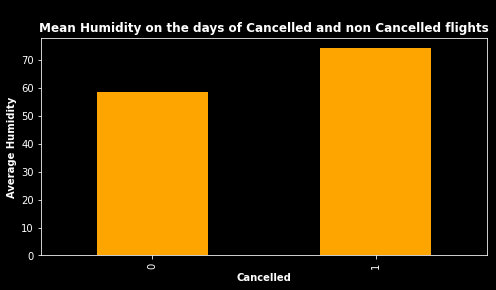

In [151]:
can_hum = cancel_ny_weather.groupby(['Cancelled']).humid.mean()
print(can_hum)
can_hum.plot(kind='bar', figsize=(8,4), color='orange')
plt.title('\nMean Humidity on the days of Cancelled and non Cancelled flights', fontweight='bold')
plt.xlabel('Cancelled', fontweight='bold')
plt.ylabel('Average Humidity', fontweight='bold')

We can see here that there is a significant relation between Humidity and Cancellations. As the humidity increaases, cancellations also increase. 

**Null hypothesis:** There is no significant relation between Humidity and Cancellation

In [152]:
non_canl = cancel_ny_weather[cancel_ny_weather.Cancelled == 0].humid
cancl = cancel_ny_weather[cancel_ny_weather.Cancelled == 1].humid
tstas, pvalue = stats.ttest_ind(non_canl, cancl, equal_var=False)
print("P-value is : {} ".format(pvalue))

P-value is : 1.1678775702583998e-135 


Since the p-value is less than 0.05 we reject the null-hypothesis. Which means there is a significant relation between Humidity and Cancellations

**Wind Direction vs Cancellations**

Cancelled
0    204.307254
1    175.636911
Name: wind_dir, dtype: float64


Text(0, 0.5, 'Average Wind Direction')

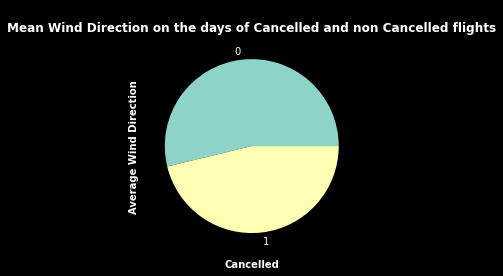

In [153]:
can_win_dir = cancel_ny_weather.groupby(['Cancelled']).wind_dir.mean()
print(can_win_dir)
can_win_dir.plot(kind='pie', figsize=(6,4))
plt.title('\nMean Wind Direction on the days of Cancelled and non Cancelled flights', fontweight='bold')
plt.xlabel('Cancelled', fontweight='bold')
plt.ylabel('Average Wind Direction', fontweight='bold')

We can see here that there is a significant relation between Wind Direction and Cancellations. 

**Null hypothesis:** There is no significant relation between Wind Direction and Cancellation 

In [154]:
non_canl = cancel_ny_weather[cancel_ny_weather.Cancelled == 0].wind_dir.dropna()
cancl = cancel_ny_weather[cancel_ny_weather.Cancelled == 1].wind_dir.dropna()
tstas, pvalue = stats.ttest_ind(non_canl, cancl, equal_var=False)
print("P-value is : {} ".format(pvalue))

P-value is : 2.073726447147906e-17 


Since the p-value is less than 0.05 we reject the null-hypothesis. Which means there is a significant relation between Wind Direction and Cancellations 

**Wind Speed VS Cancellations**

Cancelled
0    11.279686
1     9.313370
Name: wind_speed, dtype: float64


Text(0, 0.5, 'Average Wind Speed')

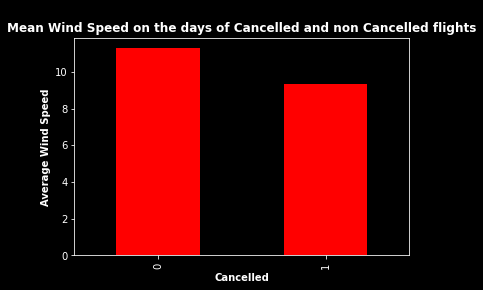

In [155]:
can_win_sp = cancel_ny_weather.groupby(['Cancelled']).wind_speed.mean()
print(can_win_sp)
can_win_sp.plot(kind='bar', figsize=(6,4), color ='red')
plt.title('\nMean Wind Speed on the days of Cancelled and non Cancelled flights', fontweight='bold')
plt.xlabel('Cancelled', fontweight='bold')
plt.ylabel('Average Wind Speed', fontweight='bold')

The difference between mean wind speed on the day of cancelled and non-cancelled flights is around 2. We can infer that there is no significant relation between wind speed and cancellations.  

**Wind Gust VS Cancellations**

Cancelled
0    25.425206
1    27.607547
Name: wind_gust, dtype: float64


Text(0, 0.5, 'Average Wind Gust')

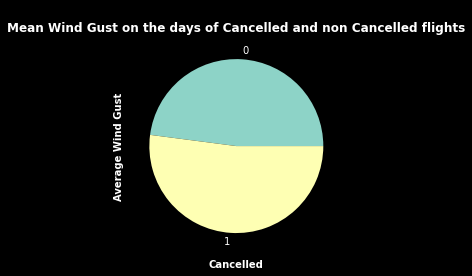

In [156]:
can_win_gus = cancel_ny_weather.groupby(['Cancelled']).wind_gust.mean()
print(can_win_gus)
can_win_gus.plot(kind='pie', figsize=(6,4))
plt.title('\nMean Wind Gust on the days of Cancelled and non Cancelled flights', fontweight='bold')
plt.xlabel('Cancelled', fontweight='bold')
plt.ylabel('Average Wind Gust', fontweight='bold')

We can see here in the plot that there is no significant relation between Wind Gust and Cancellations. As wind gust is almost similar on both cancelled days and non-cancelled days.

**Pressure VS Cancellations**

Cancelled
0    1017.927545
1    1017.201313
Name: pressure, dtype: float64


Text(0, 0.5, 'Average Wind Speed')

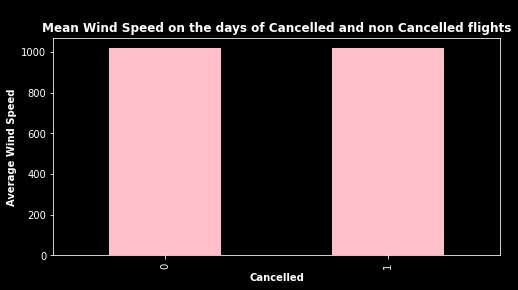

In [157]:
can_pre = cancel_ny_weather.groupby(['Cancelled']).pressure.mean()
print(can_pre)
can_pre.plot(kind='bar', figsize=(8,4), color ='pink')
plt.title('\nMean Wind Speed on the days of Cancelled and non Cancelled flights', fontweight='bold')
plt.xlabel('Cancelled', fontweight='bold')
plt.ylabel('Average Wind Speed', fontweight='bold')

As we can see the difference between pressure on cancelled days and non-cancelled days is negligible. It means there is significant relation between Pressure and Cancellations.

**Precipitation VS Cancellations**

Cancelled
0    0.003330
1    0.008539
Name: precip, dtype: float64


Text(0, 0.5, 'Average Precipitation')

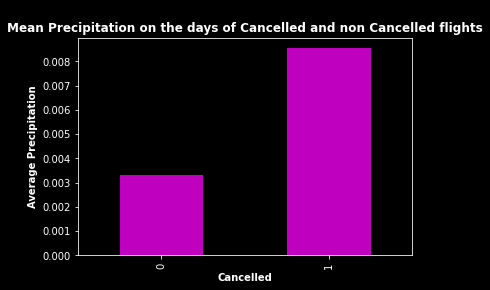

In [158]:
can_precip = cancel_ny_weather.groupby(['Cancelled']).precip.mean()
print(can_precip)
can_precip.plot(kind='bar', figsize=(6,4), color ='m')
plt.title('\nMean Precipitation on the days of Cancelled and non Cancelled flights', fontweight='bold')
plt.xlabel('Cancelled', fontweight='bold')
plt.ylabel('Average Precipitation', fontweight='bold')

We can see that there is a significant relation between Precipitation and Cancellations. Let's use hypothesis testing to prove it.

**Null Hypothesis :** There is no significant relation between percipitation and cancellations

In [159]:
non_canl = cancel_ny_weather[cancel_ny_weather.Cancelled == 0].precip
cancl = cancel_ny_weather[cancel_ny_weather.Cancelled == 1].precip
tstas, pvalue = stats.ttest_ind(non_canl, cancl, equal_var=False)
print("P-value is : {} ".format(pvalue))

P-value is : 8.272943295614399e-07 


Since the p-value is less than 0.05, we have to reject the null-hypothesis. Which means there is a significant relation between precipitation and cancellations. It means, more precipitation leads to more cancellations. 

**Visibility VS Cancellations**

Cancelled
0    9.368435
1    8.493984
Name: visib, dtype: float64


Text(0, 0.5, 'Average Visibility')

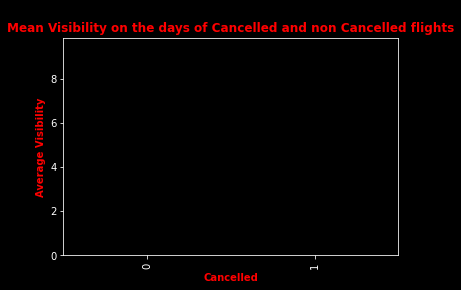

In [160]:
can_visib = cancel_ny_weather.groupby(['Cancelled']).visib.mean()
print(can_visib)
can_visib.plot(kind='bar', figsize=(6,4), color ='black')
plt.title('\nMean Visibility on the days of Cancelled and non Cancelled flights', fontweight='bold',color='r')
plt.xlabel('Cancelled', fontweight='bold',color='r')
plt.ylabel('Average Visibility', fontweight='bold',color='r')

We can see that mean visibility is less on cancelled days, so there is a relation between these two.

**Null Hypothesis:** No significant relation between Visibility and Cancellations

In [161]:
non_canl = cancel_ny_weather[cancel_ny_weather.Cancelled == 0].visib
cancl = cancel_ny_weather[cancel_ny_weather.Cancelled == 1].visib
tstas, pvalue = stats.ttest_ind(non_canl, cancl, equal_var=False)
print("P-value is : {} ".format(pvalue))

P-value is : 1.021281099487865e-19 


Since p-value is less than 0.05 we have to reject the null hypothesis. Which means there is a relation between these two. But we can see that there is negative correlation, meaning lesser visibility leads to more cancellations.

### c. Is there any relationship between the Federal Holiday Schedule and cancellations? If yes, describe it and justify with a statistical model (hypothesis testing).

In [162]:
fed_holi = pd.read_excel('https://raw.githubusercontent.com/SravaniRVS/DATA601/main/Project%202/federal-holidays-2013.xlsx',skiprows=1,nrows=10)
fed_holi['Date'] = pd.to_datetime(fed_holi['Date'])
fed_holi


,Date,Federal holiday,Day of the week
0,2013-01-01,New Year's Day,Tuesday
1,2013-01-21,Martin Luther King Day,Monday
2,2013-02-18,Presidents' Day,Monday
3,2013-05-27,Memorial Day,Monday
4,2013-07-04,Independence Day,Thursday
5,2013-09-02,Labor Day,Monday
6,2013-10-14,Columbus Day,Monday
7,2013-11-11,Veterans Day,Monday
8,2013-11-28,Thanksgiving Day,Thursday
9,2013-12-25,Christmas Day,Wednesday


In [163]:
fed_cncl = flights.groupby('Date').Cancelled.value_counts().reset_index(name='Total_Cancelled')
fed_cncl_df = fed_holi.merge(fed_cncl,on='Date')
fed_cncl_df


,Date,Federal holiday,Day of the week,Cancelled,Total_Cancelled
0,2013-01-01,New Year's Day,Tuesday,0,40
1,2013-01-21,Martin Luther King Day,Monday,0,55
2,2013-01-21,Martin Luther King Day,Monday,1,2
3,2013-02-18,Presidents' Day,Monday,0,59
4,2013-05-27,Memorial Day,Monday,0,43
5,2013-07-04,Independence Day,Thursday,0,30
6,2013-09-02,Labor Day,Monday,0,35
7,2013-09-02,Labor Day,Monday,1,8
8,2013-10-14,Columbus Day,Monday,0,49
9,2013-11-11,Veterans Day,Monday,0,50


In [164]:
fed_non_cnclll = fed_cncl_df[fed_cncl_df['Cancelled']==0].Total_Cancelled.sum()
fed_cnclll = fed_cncl_df[fed_cncl_df['Cancelled']==1].Total_Cancelled.sum()
print('Total non-cancelled flights on Federal Holidays : {}'.format(fed_non_cnclll),'\n')
print('Total cancelled flights on Federal Holidays : {}'.format(fed_cnclll))


Total non-cancelled flights on Federal Holidays : 413 

Total cancelled flights on Federal Holidays : 12


Text(0, 0.5, 'Total Cancellations')

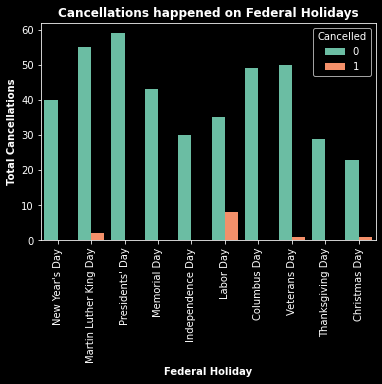

In [165]:
sns.barplot(x='Federal holiday',y='Total_Cancelled',hue='Cancelled', data=fed_cncl_df,palette='Set2',saturation=0.9 )
plt.xticks(rotation=90)
plt.title('Cancellations happened on Federal Holidays', fontweight='bold')
plt.xlabel('Federal Holiday', fontweight='bold')
plt.ylabel('Total Cancellations', fontweight='bold')


We can observe that the number of non-cancelled flights on federal holidays is much higher, at 413 flights, than the number of cancelled flights which are a mere 12.

This means there is no significant relation between Federal Holidays & Cancellations.









###d. What is the total number of seats for the cancelled flights? If we assume the average flight price of $50, what is the total economic loss?

In [166]:
tot = cancelled.seats.sum()
print("Total number of seats for the cancelled flights are : ", tot,"\n")
sum_can_fli = cancelled.carrier.value_counts().sum()
print('Total number of flights cancelled : {}'.format(sum_can_fli),'\n')
print("Total Economic loss : ${}".format(sum_can_fli*50))

Total number of seats for the cancelled flights are :  29157.0 

Total number of flights cancelled : 1005 

Total Economic loss : $50250


###e. Determine the ratio of cancelled flights/planned flights for each airline company, list it, and determine the most and least reliable airline company (most reliable = the one that has the smallest ratio of cancelled/planned)

In [167]:
cancel = cancelled.groupby(['carrier']).carrier.size().reset_index(name='Cancelled')
print('Total cancelled flights per carrier:\n',cancel,'\n')

planned = flights.groupby(['carrier']).carrier.size().reset_index(name='Planned')
print('Total planned flights per carrier:\n',planned,'\n')

temp_df = planned.merge(cancel,on='carrier',how='left').fillna(0)


def ratio(numerator,denominator):
      return str(numerator)+'/'+str(denominator)
def value(c,p):
      return c/p
temp_df['Ratio'] = temp_df.apply(lambda x: ratio(x['Cancelled'], x['Planned']),axis=1)
temp_df['Ratio_Value'] = temp_df.apply(lambda x: value(x['Cancelled'], x['Planned']), axis=1)
temp_df.sort_values(by='Ratio_Value',ascending=True)

Total cancelled flights per carrier:
   carrier  Cancelled
0      9E        156
1      B6          8
2      EV        389
3      MQ        163
4      US        248
5      WN          8
6      YV         33 

Total planned flights per carrier:
   carrier  Planned
0      9E     2594
1      B6      675
2      DL        2
3      EV     6117
4      MQ     2559
5      OO        1
6      UA        3
7      US     4716
8      WN      208
9      YV      311 



,carrier,Planned,Cancelled,Ratio,Ratio_Value
2,DL,2,0.0,0.0/2,0.000000
5,OO,1,0.0,0.0/1,0.000000
6,UA,3,0.0,0.0/3,0.000000
1,B6,675,8.0,8.0/675,0.011852
8,WN,208,8.0,8.0/208,0.038462
7,US,4716,248.0,248.0/4716,0.052587
0,9E,2594,156.0,156.0/2594,0.060139
3,EV,6117,389.0,389.0/6117,0.063593
4,MQ,2559,163.0,163.0/2559,0.063697
9,YV,311,33.0,33.0/311,0.106109


**DL**, **OO**, **UA**, are the most reliable carries with **0** cancellations.

If we only consider carriers with atleast one cancellation then US is the most reliable carrier with cancellation ratio of **0.002757**

**YV** is the least reliable carrier with a cancellation ratio of **0.106109**

Text(0.5, 1.0, 'Airline ratio of cancelled/planned')

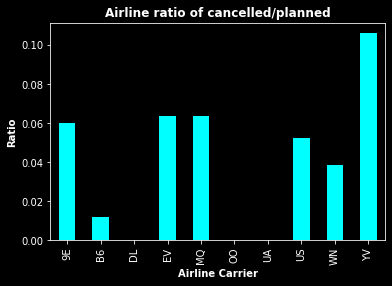

In [168]:
temp_df.set_index('carrier',inplace=True)
plot2 = temp_df.Ratio_Value.plot( kind='bar', color='cyan')
plt.xlabel("Airline Carrier",fontweight='bold')
plt.ylabel("Ratio",fontweight='bold')
plt.title("Airline ratio of cancelled/planned",fontweight='bold') 

## **Question/Task 3**


### **a. Calculate the average arrival delay for all the flights that took place in the same day and plot it (x = 1:365, y = daily average delay). On the same plot, please mark the Federal Holidays from the federal-holidays-2013.xlsx dataset.**

In [169]:
avg_arr_delay = flights.groupby('Date')['arr_delay'].mean().reset_index(name='Avg_Arr_Delay')
avg_arr_delay

,Date,Avg_Arr_Delay
0,2013-01-01,34.075000
1,2013-01-02,23.702128
2,2013-01-03,7.880000
3,2013-01-04,5.220000
4,2013-01-05,-8.325000
...,...,...
360,2013-12-27,2.090909
361,2013-12-28,1.217391
362,2013-12-29,25.785714
363,2013-12-30,-4.636364


In [170]:
import datetime
fed_holi_arr_del = fed_holi.merge(avg_arr_delay, on='Date',how='inner')
fed_holi_arr_del['Day_of_the_year'] = fed_holi_arr_del['Date'].dt.strftime('%j')
fed_holi_arr_del

,Date,Federal holiday,Day of the week,Avg_Arr_Delay,Day_of_the_year
0,2013-01-01,New Year's Day,Tuesday,34.075000,001
1,2013-01-21,Martin Luther King Day,Monday,8.771930,021
2,2013-02-18,Presidents' Day,Monday,-5.745763,049
3,2013-05-27,Memorial Day,Monday,-2.232558,147
4,2013-07-04,Independence Day,Thursday,-14.033333,185
5,2013-09-02,Labor Day,Monday,54.279070,245
6,2013-10-14,Columbus Day,Monday,-2.428571,287
7,2013-11-11,Veterans Day,Monday,-1.784314,315
8,2013-11-28,Thanksgiving Day,Thursday,6.103448,332
9,2013-12-25,Christmas Day,Wednesday,-0.500000,359


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


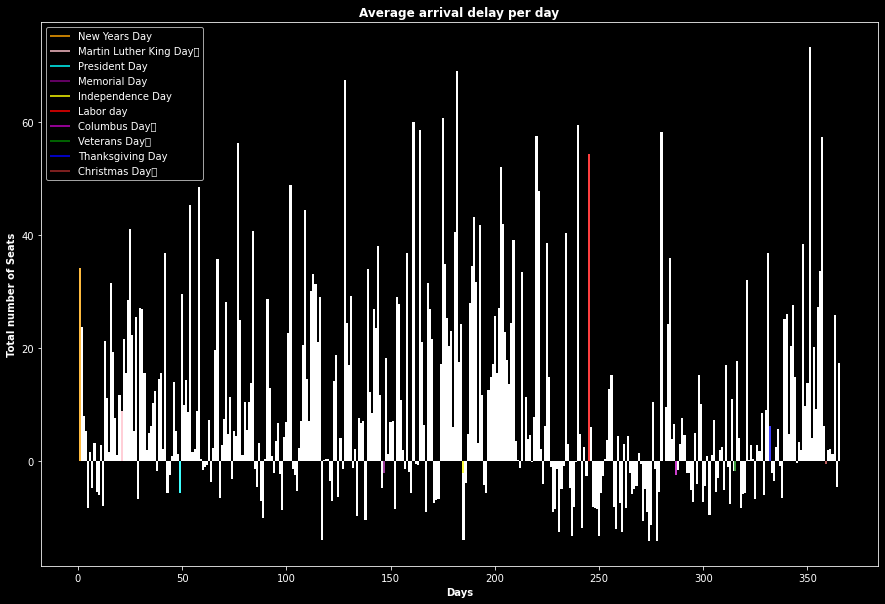

In [171]:
days = [i for i in range(1,366)]
seats = avg_arr_delay.Avg_Arr_Delay


fig, ax = plt.subplots(figsize = (15,10))


plt.style.use('dark_background')

plt.bar(days,seats,width=1,color='white')
plt.xlabel("Days", fontweight='bold')
plt.ylabel("Total number of Seats", fontweight='bold')

plt.vlines(x = 1, ymin=0,ymax =34.075,  colors = 'orange', label = 'New Years Day') 
plt.vlines(x = 21, ymin=0,ymax =8.77,  colors = 'pink', label = 'Martin Luther King Day	') 
plt.vlines(x = 49, ymin=0,ymax =-5.745763,  colors = 'cyan', label = 'President Day') 
plt.vlines(x = 147, ymin=0,ymax =-2.232558,  colors = 'purple', label = 'Memorial Day') 
plt.vlines(x = 185, ymin=0,ymax =-2.232558,  colors = 'yellow', label = 'Independence Day') 
plt.vlines(x = 245, ymin=0,ymax =54.279070,  colors = 'red', label = 'Labor day') 
plt.vlines(x = 287, ymin=0,ymax =-2.428571,  colors = 'm', label = 'Columbus Day	') 
plt.vlines(x = 315, ymin=0,ymax =-1.784314,  colors = 'green', label = 'Veterans Day	') 
plt.vlines(x = 332, ymin=0,ymax =6.103448,  colors = 'blue', label = 'Thanksgiving Day') 
plt.vlines(x = 359, ymin=0,ymax =-0.500000,  colors = 'brown', label = 'Christmas Day	') 


plt.title("Average arrival delay per day", fontweight='bold')

plt.plot()
plt.legend()
plt.show()


### **b. Is there a correlation between the weather datasets and daily average arrival delay? Justify your answer with a statistical model (hypothesis testing)**

In [172]:
weather_flights = flights.merge(ny_weather, on=['Date','origin','year','month','day'])

**Temperature vs. Delay**

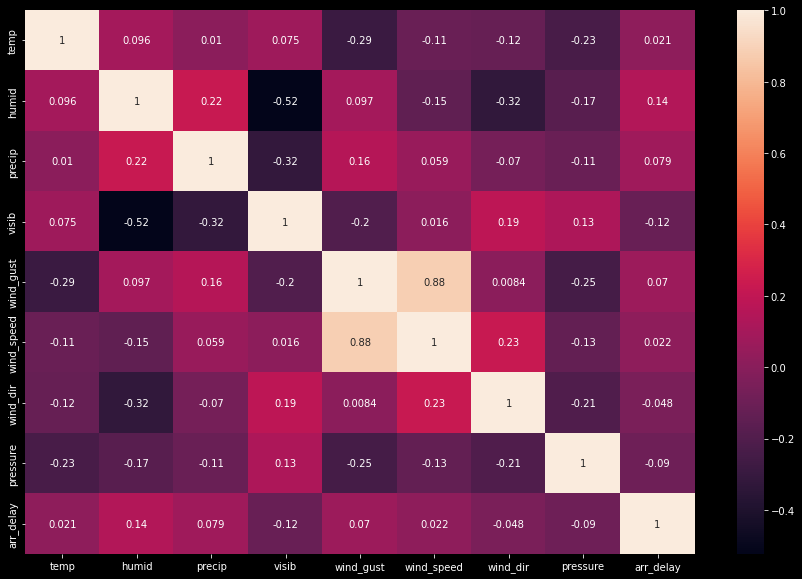

In [173]:
plt.figure(figsize = (15,10))
variables = ['temp','humid','precip','visib','wind_gust','wind_speed','wind_dir','pressure','arr_delay']
weather_flights[variables].corr(method="pearson")
correlation = weather_flights[variables].corr(method="pearson")
sns.heatmap(correlation,xticklabels = correlation.columns,yticklabels = correlation.columns, annot=True)


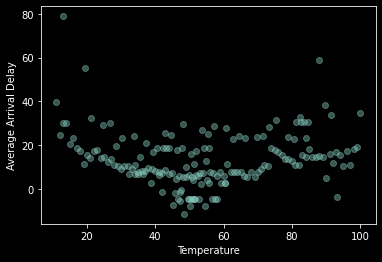

In [174]:
# aggregate average departure delay by temperature
temp_delay = weather_flights.groupby('temp', as_index = False)['arr_delay'].mean()
temp_delay
# plot a scatter plot that takes temperature as predictor, and departure delay as response
plt.xlabel("Temperature")
plt.ylabel("Average Arrival Delay")
plt.scatter(temp_delay.temp, temp_delay.arr_delay, alpha=0.4)

We can see here that temperature has just 0.021 correlation with arrival delay. We can infer from that, that there is no significant effect of temperatureon arrival delays.

**Humidity vs. Delay**

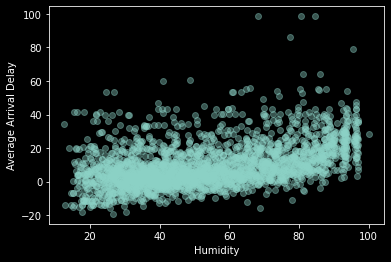

In [175]:
# aggregate average departure delay by humidity
humid_delay = weather_flights.groupby('humid', as_index = False)['arr_delay'].mean()

# plot a scatter plot that takes humidity as predictor, and departure delay as response
plt.xlabel("Humidity")
plt.ylabel("Average Arrival Delay")
plt.scatter(humid_delay.humid, humid_delay.arr_delay, alpha=0.4)

We can see here in the plot that as humidity increases arrival delay is also increasing. That means it has a relation. Try to find out by performing a null hypothesis.
 

**Null Hypothesis :** There is no significant relation between humidity and arrival delay

In [176]:
non_canl = humid_delay.arr_delay
cancl = humid_delay.humid
tstas, pvalue = stats.ttest_ind(non_canl, cancl, equal_var=False)
print("P-value is : {} ".format(pvalue))

P-value is : 0.0 


Since the p-value is less than 0.05. We have to reject the null hypothesis, which means there is a significant relations between humidity and arrival delays.

**Wind Direction vs. Delay**

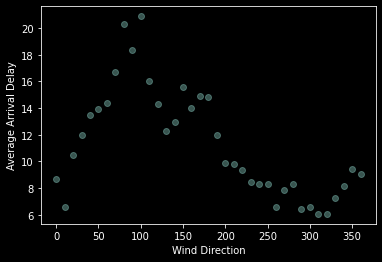

In [177]:
# aggregate average departure delay by wind direction 
dir_delay = weather_flights.groupby('wind_dir', as_index = False)['arr_delay'].mean()

# plot a scatter plot that takes wind direction as predictor, and departure delay as response
plt.xlabel("Wind Direction")
plt.ylabel("Average Arrival Delay")
plt.scatter(dir_delay.wind_dir, dir_delay.arr_delay, alpha=0.4)

We can observe that there is a negative correlation between wind direction and average arrival delay. Let's try to find out by performing null hypothesis.

**Null Hypothesis:** there is no significant relation between wind direction and arrival delay.

In [178]:
non_canl = dir_delay.arr_delay
cancl = dir_delay.wind_dir
tstas, pvalue = stats.ttest_ind(non_canl, cancl, equal_var=False)
print("P-value is : {} ".format(pvalue))

P-value is : 2.514571499799725e-11 


Since the p-value is less than 0.05 we have to reject the null hypothesis, that means there is a significant relation between wind direction and arrival delay. 

**Wind Speed vs. Delay**

(-3.0, 45.0)

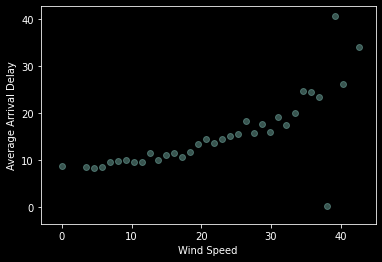

In [179]:
# aggregate average departure delay by wind speed 
speed_delay = weather_flights.groupby('wind_speed', as_index = False)['arr_delay'].mean()

# plot a scatter plot that takes wind speed as predictor, and departure delay as response
plt.xlabel("Wind Speed")
plt.ylabel("Average Arrival Delay")
plt.scatter(speed_delay.wind_speed, speed_delay.arr_delay, alpha=0.4)

# filter out out-liers
plt.xlim(-3,45)

Wind speed has a correlation value of 0.02 with arrival delay. That is not  a significant amount. But let's perform hypothesis testing anyway to find this out.

Null hypothesis: There is no significant relation between wind direction and arrival delay.

In [180]:
non_canl = speed_delay.arr_delay
cancl = speed_delay.wind_speed
tstas, pvalue = stats.ttest_ind(non_canl, cancl, equal_var=False)
print("P-value is : {} ".format(pvalue))

P-value is : 0.22166683321789096 


Since the p-value is more than 0.05, we have to accept the null hypothesis, that means there is no significant relation between wind speed and arrival delay.

**Wind Gust vs. Delay**

(-3.0, 50.0)

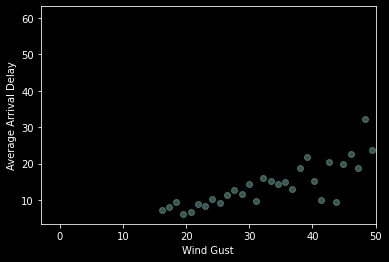

In [181]:
# aggregate average departure delay by wind gust
gust_delay = weather_flights.groupby('wind_gust', as_index = False)['arr_delay'].mean()

# plot a scatter plot that takes wind gust as predictor, and departure delay as response
plt.xlabel("Wind Gust")
plt.ylabel("Average Arrival Delay")
plt.scatter(gust_delay.wind_gust, gust_delay.arr_delay, alpha=0.4)

# filter out out-liers
plt.xlim(-3,50)

We can see in this plot that arrival delay increases when wind gust increases. Let's use hypothesis tesing to find out more.

**Null hypothesis:** There is no significant relation between wind gust and arrival delay.

In [182]:
non_canl = gust_delay.arr_delay
cancl = gust_delay.wind_gust
tstas, pvalue = stats.ttest_ind(non_canl, cancl, equal_var=False)
print("P-value is : {} ".format(pvalue))

P-value is : 8.363215537002272e-10 


Since, the p-value is less than 0.05 we have to reject the null hypothesis, that means there is a significant relation between wind gust and arrival delay. 

**Pressure vs. Delay**

(-15.0, 130.0)

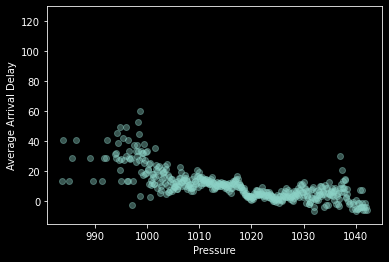

In [183]:
# aggregate average departure delay by pressure
pre_delay = weather_flights.groupby('pressure', as_index = False)['arr_delay'].mean()

# plot a scatter plot that takes the pressure as predictor, and departure delay as response
plt.xlabel("Pressure")
plt.ylabel("Average Arrival Delay")
plt.scatter(pre_delay.pressure, pre_delay.arr_delay, alpha=0.4)

# filter out out-liers
plt.ylim(-15,130)

**Null hypothesis:** There is no significant relation between pressure and arrival delay.

In [184]:
non_canl = pre_delay.arr_delay
cancl = pre_delay.pressure
tstas, pvalue = stats.ttest_ind(non_canl, cancl, equal_var=False)
print("P-value is : {} ".format(pvalue))

P-value is : 0.0 


Since, the p-value is less than 0.05 we have to reject the null hypothesis, that means there is a significant relation between pressure and arrival delay.

**Precipitation vs. Delay**

(-0.01, 0.5)

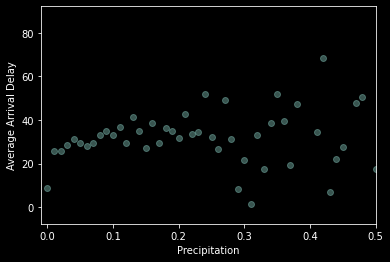

In [185]:
# aggregate average departure delay by precipitation
precip_delay = weather_flights.groupby('precip', as_index = False)['arr_delay'].mean()

# plot a scatter plot that takes the precipitation as predictor, and departure delay as response
plt.xlabel("Precipitation")
plt.ylabel("Average Arrival Delay")
plt.scatter(precip_delay.precip, precip_delay.arr_delay, alpha=0.4)

# filter out out-liers
plt.xlim(-0.01,0.5)

The correlation value of precipitaion and arrival delay is just 0.07. That means there is no significant relation between these two. We can also see in the plot that arrival delay remains mostly similar even when the precipitation increases.

**Visibility vs. Delay**

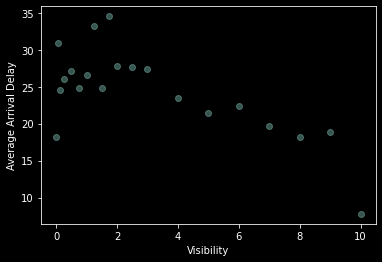

In [186]:
# aggregate average departure delay by visibility
visib_delay = weather_flights.groupby('visib', as_index = False)['arr_delay'].mean()

# plot a scatter plot that takes visibility as predictor, and departure delay as response
plt.xlabel("Visibility")
plt.ylabel("Average Arrival Delay")
plt.scatter(visib_delay.visib, visib_delay.arr_delay, alpha=0.4)

Visibility has a correlation value of -0.12 with arrival delay, that means it has a negative correlation. Here we can see that if the level of visibily decreases arrival delay increases. Using hypothesis testing to find out more.

**Null Hypothesis:**  There is no significant relation between visibility and arrival delay.


In [187]:
non_canl = visib_delay.arr_delay
cancl = visib_delay.visib
tstas, pvalue = stats.ttest_ind(non_canl, cancl, equal_var=False)
print("P-value is : {} ".format(pvalue))

P-value is : 2.6847187671254106e-14 


Since the p-value is less than 0.05, we have to reject the null hypothesis, that means there is relation between visibility and arrival delay.

### c. Is there a correlation between the Federal Holiday Schedule and daily average arrival delay?

In [188]:
avg_arr_delay = flights.groupby('Date')['arr_delay'].mean().reset_index(name='Avg_Arr_Delay')
avg_arr_delay
import datetime

fed_holi_arr_del = fed_holi.merge(avg_arr_delay, on='Date',how='inner')
fed_holi_arr_del



,Date,Federal holiday,Day of the week,Avg_Arr_Delay
0,2013-01-01,New Year's Day,Tuesday,34.075000
1,2013-01-21,Martin Luther King Day,Monday,8.771930
2,2013-02-18,Presidents' Day,Monday,-5.745763
3,2013-05-27,Memorial Day,Monday,-2.232558
4,2013-07-04,Independence Day,Thursday,-14.033333
5,2013-09-02,Labor Day,Monday,54.279070
6,2013-10-14,Columbus Day,Monday,-2.428571
7,2013-11-11,Veterans Day,Monday,-1.784314
8,2013-11-28,Thanksgiving Day,Thursday,6.103448
9,2013-12-25,Christmas Day,Wednesday,-0.500000


Text(0, 0.5, 'Average Arrival Delay')

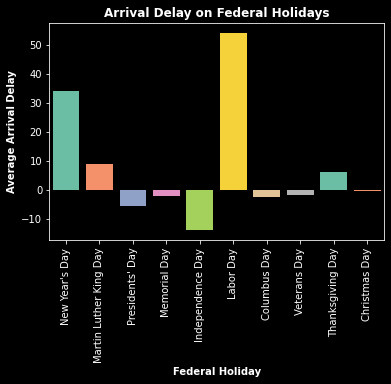

In [189]:
sns.barplot(x='Federal holiday',y='Avg_Arr_Delay', data=fed_holi_arr_del,palette='Set2',saturation=0.9 )
plt.xticks(rotation=90)
plt.title('Arrival Delay on Federal Holidays', fontweight='bold')
plt.xlabel('Federal Holiday', fontweight='bold')
plt.ylabel('Average Arrival Delay', fontweight='bold')

#### As we can see from the above figure that the arrival delay is negative for 5 of these days, thus there is no significant relation. 

### **d. Calculate the average arrival delay for all the flights for each arrival airport (e.g. IAD, DCA, and BWI) and determine most and least reliables (most reliable = the one that has the shortest average delay)**

In [190]:
dest_avg_arr = flights.groupby('dest').arr_delay.mean().reset_index(name='Average_Arrival_Delay')
dest_avg_arr

,dest,Average_Arrival_Delay
0,BWI,10.160584
1,DCA,8.512004
2,IAD,13.093158


**DCA** is the most reliable airport with least average arrival delay of **8.512004**.

And **IAD** is the least reliable with average arrival delay of **13.093158**

Text(0.5, 1.0, 'Average Arrival Delay per destination airport')

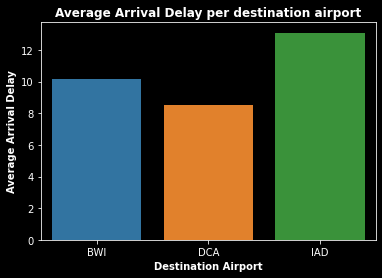

In [191]:
plott = sns.barplot(x='dest',y='Average_Arrival_Delay',data=dest_avg_arr,palette= "tab10")
plott.set_xlabel('Destination Airport', fontweight='bold')
plott.set_ylabel('Average Arrival Delay', fontweight='bold')
plott.set_title('Average Arrival Delay per destination airport', fontweight='bold')

###**e. Calculate the average arrival delay for all the airlines and determine most and least reliables (most reliable = the one that has the shortest average delay)**

In [192]:
carrier_arr_delay = flights.groupby('carrier').arr_delay.mean().reset_index(name='Average_Arrival_Delay')
carrier_arr_delay

,carrier,Average_Arrival_Delay
0,9E,3.409792
1,B6,12.653333
2,DL,-8.000000
3,EV,16.248651
4,MQ,10.263775
5,OO,3.000000
6,UA,-7.666667
7,US,5.531383
8,WN,4.725962
9,YV,16.909968


Text(0.5, 1.0, 'Average Arrival Delay per Carrier')

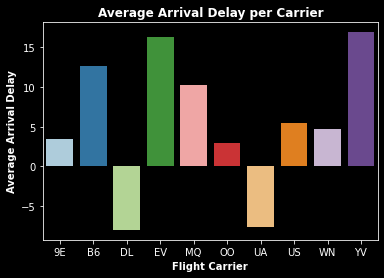

In [193]:
plott1 = sns.barplot(x='carrier',y='Average_Arrival_Delay',data=carrier_arr_delay,palette= "Paired")
plott1.set_xlabel('Flight Carrier', fontweight='bold')
plott1.set_ylabel('Average Arrival Delay', fontweight='bold')
plott1.set_title('Average Arrival Delay per Carrier', fontweight='bold')

**DL** is the most reliable airline carrier with **-8.00000** average arrival delay. It means the flights arrive 8 minutes early than the scheduled arrival time. 

And **YV** is least reliable with **16.909968** average arival delay. That means YV flights arrive 16 minutes after the scheduled time.

### **f. What day of the week we had the highest average arrival delay?**

In [194]:
temp_df1 = flights
temp_df1['Weekday'] = temp_df1['Date'].dt.strftime('%A')


In [195]:
week_delay = temp_df1.groupby('Weekday').arr_delay.mean().reset_index(name='Average_Delay')
week_delay

,Weekday,Average_Delay
0,Friday,12.212620
1,Monday,14.321970
2,Saturday,3.834410
3,Sunday,6.270552
4,Thursday,11.530760
5,Tuesday,9.940732
6,Wednesday,10.565152


**Monday** has the highest average delay of **14.321970**.
And **Saturday** has the least average delay with **6.270552**.

Text(0.5, 1.0, 'Average Delay each day')

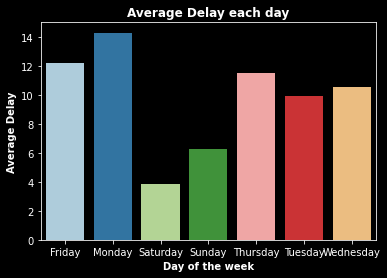

In [196]:
plott2 = sns.barplot(x='Weekday',y='Average_Delay',data=week_delay,palette= "Paired")
plott2.set_xlabel('Day of the week', fontweight='bold')
plott2.set_ylabel('Average Delay', fontweight='bold')
plott2.set_title('Average Delay each day', fontweight='bold')

###**g. Which one had a higher average delay: flights that took off in the morning (6 am to 10 am), noon (11 am to 2 pm), afternoon (3 pm to 5pm), or evening (6 pm to 10 pm)?**

In [197]:
def f(x):
    if (x >=6) and (x <= 10):
        return 'Morning'
    elif (x >= 11) and (x <= 14 ):
        return 'Noon'
    elif (x >= 15) and (x <= 17):
        return'After Noon'
    elif (x >= 18) and (x <= 22) :
        return 'Evening'
    elif (x >= 23) and (x <= 24):
        return'Night'
temp_df1['session'] =temp_df1['hour'].apply(f)
#temp_df1

In [198]:
ses_avg_gelay = temp_df1.groupby('session').dep_delay.mean().reset_index(name='Average_Arrival_Delay').sort_values(by='Average_Arrival_Delay')
ses_avg_gelay

,session,Average_Arrival_Delay
2,Morning,1.838044
4,Noon,8.064988
0,After Noon,19.405076
1,Evening,24.620250
3,Night,139.206897


Since we need flights that took off we need to calculate departure delay, and if we only consider morning, noon, afternoon and evening, then the highest average delay is in the **Evening** with **24.620250** minutes of delay.

And flights leaving in the **Morning** has the least average delay of **1.838044**

But if we also include **Night**, then it has the highest average delay of **139.206897** minutes.

Text(0.5, 1.0, 'Average Arrival Delay per Session')

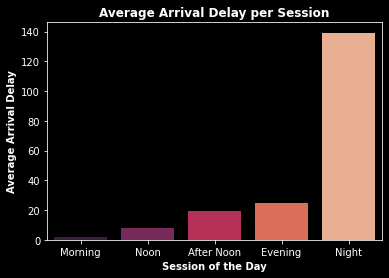

In [199]:
plott3 = sns.barplot(x='session',y='Average_Arrival_Delay',data=ses_avg_gelay,palette= "rocket")
plott3.set_xlabel('Session of the Day', fontweight='bold')
plott3.set_ylabel('Average Arrival Delay', fontweight='bold')
plott3.set_title('Average Arrival Delay per Session', fontweight='bold')

### **h. Determine the number of airplanes used in these flights manufactured by BOEING, EMBRAER, and AURBUS separately.**

In [200]:
manu_tot = merged_df.groupby('manufacturer').tailnum.nunique().reset_index(name='Total')
manu_tot = manu_tot[(manu_tot['manufacturer']=='BOEING')  | (manu_tot['manufacturer']=='EMBRAER') | (manu_tot['manufacturer']=='AIRBUS INDUSTRIE') | (manu_tot['manufacturer']=='AIRBUS')]
manu_tot

,manufacturer,Total
0,AIRBUS,4
1,AIRBUS INDUSTRIE,63
2,BOEING,167
7,EMBRAER,299





1.   The number of airplanes used in these flights manufactured by BOEING are : 167.

2. The number of airplanes used in these flights manufactured by EMBRAER are : 299
3.   The number of airplanes used in these flights manufactured by AIRBUS are : 4

4.   The number of airplanes used in these flights manufactured by AIRBUS INDUSTRIE are : 63



Text(0.5, 1.0, 'Total airplanes manufactured by BOEING, EMBRAER, and AURBUS')

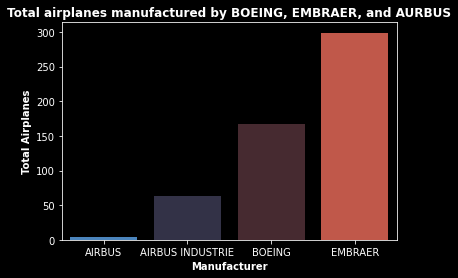

In [201]:
plott4 = sns.barplot(x='manufacturer',y='Total',data=manu_tot,palette= "icefire")
plott4.set_xlabel('Manufacturer', fontweight='bold')
plott4.set_ylabel('Total Airplanes', fontweight='bold')
plott4.set_title('Total airplanes manufactured by BOEING, EMBRAER, and AURBUS', fontweight='bold')

# Question 4

In [202]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction import DictVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, accuracy_score

test_data1 = pd.read_excel('https://raw.githubusercontent.com/SravaniRVS/DATA601/main/Project%202/flights-test-data.xlsx')

test_data1

,year,month,day,carrier,origin,dest,distance
0,2013,1,6,MQ,JFK,DCA,213
1,2013,1,25,EV,LGA,IAD,229
2,2013,2,11,MQ,JFK,DCA,213
3,2013,4,14,US,LGA,DCA,214
4,2013,4,29,EV,LGA,IAD,229
5,2013,5,26,MQ,JFK,DCA,213
6,2013,7,14,MQ,JFK,BWI,184
7,2013,7,16,US,LGA,DCA,214
8,2013,8,1,EV,EWR,IAD,212
9,2013,9,29,US,LGA,DCA,214


In [203]:
Y=flights["arr_delay"].values.reshape(-1,1)
X=flights[["dep_delay","hour","dep_time","arr_time"]]
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=17)
linreg=LinearRegression()
linreg.fit(X_train,Y_train)

LinearRegression()

In [204]:
print('Model Accuracy: ',linreg.score(X_test,Y_test))

Model Accuracy:  0.841852805961357


In [205]:
test_data1['prediction']=linreg.predict(test_data1[["year","month","day","distance"]])
test_data1

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- day
- distance
- month
- year
Feature names seen at fit time, yet now missing:
- arr_time
- dep_delay
- dep_time
- hour

  warnings.warn(message, FutureWarning)


,year,month,day,carrier,origin,dest,distance,prediction
0,2013,1,6,MQ,JFK,DCA,213,2095.981474
1,2013,1,25,EV,LGA,IAD,229,2095.629629
2,2013,2,11,MQ,JFK,DCA,213,2097.329798
3,2013,4,14,US,LGA,DCA,214,2100.227719
4,2013,4,29,EV,LGA,IAD,229,2099.974558
5,2013,5,26,MQ,JFK,DCA,213,2101.374769
6,2013,7,14,MQ,JFK,BWI,184,2104.369979
7,2013,7,16,US,LGA,DCA,214,2104.627184
8,2013,8,1,EV,EWR,IAD,212,2106.500102
9,2013,9,29,US,LGA,DCA,214,2107.242025


#### The test data provided here contains 7 columns out of which 3 columns "carrier", "origin" and "dest" is irrelevant for the Linear regression model because they are string type. Out of the four remaining columns the "year", "month" and "day" features does not provide a remarkable contribution in the prediction because they are not unique to provide a strong prediction. Moreover, the test data does not have ample amount of data to provide proper prediction. We tried to train data with some  particular features so that we can get a respectful accuracy.

##  Question/Task 5

### Build a logistic regression model to guess the 3 cancelled flights given in "fligts_test_data.xlsx". Again, you have the full autorithy to decide what columns, what datasets (among the given datasets) to work with. In your report, please explain how you build the LogReg model and eloborate on its accuracy.

In [206]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction import DictVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, accuracy_score

test_data = pd.read_excel('https://raw.githubusercontent.com/SravaniRVS/DATA601/main/Project%202/flights-test-data.xlsx')

test_data

,year,month,day,carrier,origin,dest,distance
0,2013,1,6,MQ,JFK,DCA,213
1,2013,1,25,EV,LGA,IAD,229
2,2013,2,11,MQ,JFK,DCA,213
3,2013,4,14,US,LGA,DCA,214
4,2013,4,29,EV,LGA,IAD,229
5,2013,5,26,MQ,JFK,DCA,213
6,2013,7,14,MQ,JFK,BWI,184
7,2013,7,16,US,LGA,DCA,214
8,2013,8,1,EV,EWR,IAD,212
9,2013,9,29,US,LGA,DCA,214


In [207]:
df = pd.merge(flights, ny_weather,on=['Date', 'year','month','day','hour','date_time','origin'],  how='inner')
df['Cancelled'] = df['Cancelled'].astype('int')
df

,Date,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,...,wind_gust,precip,pressure,visib,time_hour,Max Temp,Min Temp,Precipitation,Snowfall,Snow Depth
0,2013-01-01,2013,1,1,629.0,-1.0,721.0,-19.0,WN,N273WN,...,23.01560,0.0,1011.7,10.0,2013-01-01T11:00:00Z,41,27,0,0,0
1,2013-01-01,2013,1,1,848.0,853.0,1001.0,851.0,MQ,N942MQ,...,NaN,0.0,1012.6,10.0,2013-01-01T13:00:00Z,41,27,0,0,0
2,2013-01-01,2013,1,1,821.0,-4.0,932.0,-13.0,MQ,N846MQ,...,NaN,0.0,1012.6,10.0,2013-01-01T13:00:00Z,41,27,0,0,0
3,2013-01-01,2013,1,1,1059.0,-1.0,1201.0,-14.0,WN,N505SW,...,20.71404,0.0,1012.1,10.0,2013-01-01T15:00:00Z,41,27,0,0,0
4,2013-01-01,2013,1,1,1058.0,-2.0,1210.0,-6.0,US,N951UW,...,20.71404,0.0,1012.1,10.0,2013-01-01T15:00:00Z,41,27,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17115,2013-12-30,2013,12,30,957.0,-15.0,1120.0,-15.0,EV,N877AS,...,NaN,0.0,1013.7,10.0,2013-12-30T14:00:00Z,47,24,0,0,0
17116,2013-12-30,2013,12,30,1355.0,-11.0,1459.0,-27.0,EV,N829AS,...,25.31716,0.0,1016.4,10.0,2013-12-30T18:00:00Z,47,24,0,0,0
17117,2013-12-30,2013,12,30,1453.0,21.0,1611.0,16.0,EV,N825AS,...,21.86482,0.0,1017.1,10.0,2013-12-30T19:00:00Z,47,24,0,0,0
17118,2013-12-30,2013,12,30,1732.0,-8.0,1846.0,-14.0,B6,N236JB,...,NaN,0.0,1020.1,10.0,2013-12-30T22:00:00Z,47,24,0,0,0


In [208]:
new_df = df.drop(columns=['tailnum','date_time','Precipitation','Date','time_hour', 'dewp',
  'dep_delay','arr_delay','Snow Depth','Snowfall'])

new_df = new_df.reindex(columns=['year', 'month', 'day', 'dep_time', 'arr_time',
       'carrier', 'flight', 'origin', 'dest', 'air_time',
       'distance', 'hour', 'minute', 'temp', 'humid',
       'wind_dir', 'wind_speed', 'wind_gust', 'precip','pressure', 'visib','Max Temp','Min Temp','Cancelled'])
new_df.fillna(0,inplace=True)


In [209]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
for column_name in new_df.columns:
      if new_df[column_name].dtype == object:
          new_df[column_name] = le.fit_transform(new_df[column_name])
      else:
          pass

X=new_df.iloc[:,:-1]
y= new_df.iloc[:,-1].values.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [210]:
print('Model Accuracy: ',logreg.score(X_test,y_test))

Model Accuracy:  1.0


In [211]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
print("Feature data dimension: ", X.shape)

select = SelectKBest(score_func=chi2, k=7)
z = select.fit_transform(X, y)
print("After selecting best k features:", z.shape)


filter = select.get_support()
features = np.array(X.columns.tolist())
 
print("\nSelected best features:")
print(features[filter])

Feature data dimension:  (17120, 23)
After selecting best k features: (17120, 7)

Selected best features:
['dep_time' 'arr_time' 'flight' 'air_time' 'hour' 'minute' 'pressure']


In [212]:
x_filtered = X.iloc[:,filter]
X_train, X_test, y_train, y_test = train_test_split(x_filtered.values, y, test_size=0.2, random_state=1)

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [213]:
print('Model Accuracy:',logreg.score(X_test,y_test))

Model Accuracy: 1.0


In [214]:
from sklearn import preprocessing

class MultiColumnLabelEncoder:

    def __init__(self, columns=None):
        self.columns = columns # array of column names to encode

    def fit(self, X, y=None):
        self.encoders = {}
        columns = X.columns if self.columns is None else self.columns
        for col in columns:
            self.encoders[col] = preprocessing.LabelEncoder().fit(X[col])
        return self

    def transform(self, X):
        output = X.copy()
        columns = X.columns if self.columns is None else self.columns
        for col in columns:
            output[col] = self.encoders[col].transform(X[col])
        return output

    def fit_transform(self, X, y=None):
        return self.fit(X,y).transform(X)

    def inverse_transform(self, X):
        output = X.copy()
        columns = X.columns if self.columns is None else self.columns
        for col in columns:
            output[col] = self.encoders[col].inverse_transform(X[col])
        return output

In [215]:
encoded = MultiColumnLabelEncoder(columns=['carrier','origin','dest'])
a = encoded.fit_transform(test_data)

a['Prediction'] = logreg.predict(a)
final_result = encoded.inverse_transform(a)
final_result

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


,year,month,day,carrier,origin,dest,distance,Prediction
0,2013,1,6,MQ,JFK,DCA,213,0
1,2013,1,25,EV,LGA,IAD,229,0
2,2013,2,11,MQ,JFK,DCA,213,0
3,2013,4,14,US,LGA,DCA,214,0
4,2013,4,29,EV,LGA,IAD,229,0
5,2013,5,26,MQ,JFK,DCA,213,0
6,2013,7,14,MQ,JFK,BWI,184,0
7,2013,7,16,US,LGA,DCA,214,0
8,2013,8,1,EV,EWR,IAD,212,0
9,2013,9,29,US,LGA,DCA,214,0
